# Simple linear regression 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

import os

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The first type of model, which we will spend a lot of time on, is the *simple linear regresssion model*. One simple way to think of it is via scatter plots. Below are heights of mothers and daughters collected by Karl Pearson in the late 19th century. 

In [68]:
fpath=r'.\data\01_heights.csv'

heights=pd.read_table(fpath,sep=',',index_col=0)
heights.head()

,Mheight,Dheight
1,59.7,55.1
2,58.2,56.5
3,60.6,56.0
4,60.7,56.8
5,61.8,56.0


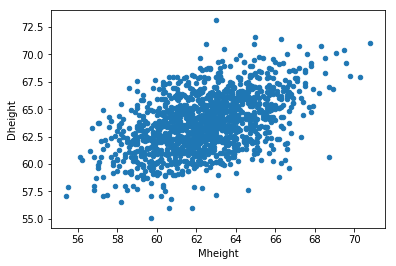

In [69]:
heights.plot.scatter(x='Mheight',y='Dheight')
plt.show()

A simple linear regression model fits a line through the above scatter plot in a particular way. Specifically, it tries to estimate the height of a new daughter in this population, say $D_{new}$, whose mother had height $H_{new}$. It does this by considering each slice of the data. Here is a slice of the data near $M=66$, the slice is taken over a window of size 1 inch.

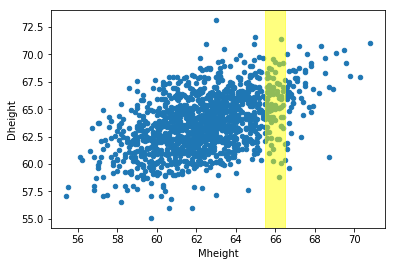

In [4]:
X = 66

heights.plot.scatter(x='Mheight',y='Dheight')
plt.axvspan(X-.5, X+.5,color='yellow',alpha=0.5)
plt.show()

In [5]:
selected_points = heights.Mheight.between(X-.5, X+.5)
mean_within_slice = heights.Dheight[selected_points].mean()
print(mean_within_slice)

65.17333333333333


We see that, in our sample, the average height of daughters whose height fell within our slice is about 65.2 inches. Of course this height varies by slice. For instance, at 60 inches:

In [6]:
X = 60
selected_points = heights.Mheight.between(X-.5, X+.5)
mean_within_slice = heights.Dheight[selected_points].mean()
print(mean_within_slice)

62.42828947368421


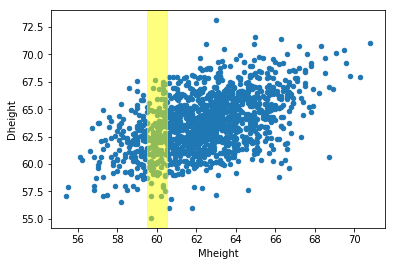

In [7]:
heights.plot.scatter(x='Mheight',y='Dheight')
plt.axvspan(X-.5, X+.5,color='yellow',alpha=0.5)
plt.show()

The regression model puts a line through this scatter plot in an *optimal* fashion.

In [70]:
heights_fit = smf.ols('Dheight ~ Mheight',data=heights).fit()
heights_fit.params

Intercept    29.917437
Mheight       0.541747
dtype: float64

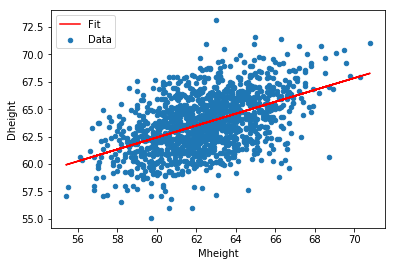

In [71]:
fig, ax = plt.subplots()
heights.plot.scatter(x='Mheight',y='Dheight',ax=ax,label='Data')
ax.plot(heights.Mheight, heights_fit.predict(heights.Mheight), color='red', label='Fit')
ax.legend()
plt.show()

## What is a "regression" model?

A regression model is a model of the relationships between some covariates (predictors) and an outcome. Specifically, regression is a model of the average outcome given the covariates.

## Mathematical formulation

For height of couples data: a mathematical model:
$$
{\tt Daughter} = f({\tt Mother}) + \varepsilon
$$
where $f$ gives the average height of the daughter of a mother of height Mother and $\varepsilon$ is the random variation within the slice.

## Linear regression models

* A *linear* regression model says that
the function $f$ is a sum (linear combination) of functions of ${\tt Mother}$.

* Simple linear regression model:
   $$f({\tt Mother}) = \beta_0 + \beta_1 \cdot {\tt Mother}$$
   for some unknown parameter vector $(\beta_0, \beta_1)$.

* Could also be a sum (linear combination) of *fixed* functions of `Mother`:
   $$f({\tt Mother}) = \beta_0 + \beta_1 \cdot {\tt Mother} + \beta_2 \cdot {\tt Mother}^2
   $$

## Simple linear regression model

 *  *Simple linear* regression is the case when there is only one predictor:
   $$
   f({\tt Mother}) = \beta_0 + \beta_1  \cdot {\tt Mother}.$$

* Let $Y_i$ be the height of the $i$-th daughter in the sample, $X_i$ be the height of the $i$-th mother.

* Model:
   $$
   Y_i = \underbrace{\beta_0 + \beta_1 X_i}_{\text{regression equation}} + \underbrace{\varepsilon_i}_{\text{error}}$$
   where $\varepsilon_i \sim N(0, \sigma^2)$ are independent.

* This specifies a *distribution* for the $Y$'s given the $X$'s, i.e.
   it is a *statistical model*.

## Fitting the model

* We will be using *least squares* regression. This measures
   the *goodness of fit* of a line by the sum of squared errors, $SSE$.
   
* Least squares regression chooses the line that minimizes
   $$
   SSE(\beta_0, \beta_1) = \sum_{i=1}^n (Y_i - \beta_0 - \beta_1 \cdot X_i)^2.$$

* In principle, we might measure goodness of fit differently: 
   $$
   SAD(\beta_0, \beta_1) = \sum_{i=1}^n |Y_i - \beta_0 - \beta_1 \cdot X_i|.$$
   
* For some *loss function* $L$ we might try to minimize
    $$
    L(\beta_0,\beta_1) = \sum_{i=1}^n L(Y_i-\beta_0-\beta_1X_i) 
    $$

## Why least squares?

* With least squares, the minimizers have explicit formulae -- not so important with today's computer power -- especially when $L$ is convex.

* Resulting formulae are *linear* in the outcome $Y$. This is important
   for inferential reasons. For only predictive power, this is also not so important.
   
* If assumptions are correct, then this is *maximum likelihood estimation*.

* Statistical theory tells us the *maximum likelihood estimators (MLEs)* are generally good estimators.

## Choice of loss function

The choice of the function we use to measure goodness of fit, or the *loss* function, has an outcome on what
sort of estimates we get out of our procedure. For instance, if, instead of fitting a line to a scatterplot, we were
estimating a *center* of a distribution, which we denote by $\mu$, then we might consider minimizing several loss functions.


## Choice of loss function

* If we choose the sum of squared errors:
$$
SSE(\mu) = \sum_{i=1}^n (Y_i - \mu)^2.
$$
Then, we know that the minimizer of $SSE(\mu)$ is the sample mean.

* On the other hand, if we choose the sum of the absolute errors
 $$
   SAD(\mu) = \sum_{i=1}^n |Y_i - \mu|.$$
   Then, the resulting minimizer is the sample median.
   
* Both of these minimization problems also have *population* versions as well. For instance, the population mean
minimizes, as a function of $\mu$
$$
\mathbb{E}((Y-\mu)^2)
$$
while the population median minimizes
$$
\mathbb{E}(|Y-\mu|).
$$

## Visualizing the loss function

Let's take a random scatter plot and view the loss function.

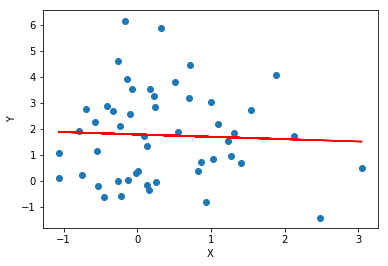

In [10]:
X = sp.random.normal(size=50)
Y = 1.5 + 0.1 * X + sp.random.normal(size=50) * 2

XC = sm.add_constant(X)
results = sm.OLS(Y, XC).fit()
results.summary()

plt.scatter(X,Y)
plt.plot(X,results.predict(XC), color='red', label='Fit')

plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
plt.show()

Let's plot the *loss* as a function of the parameters. Note that the *true* intercept is 1.5 while the *true* slope is 0.1.

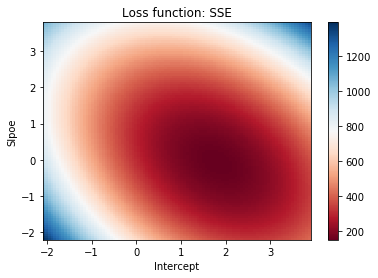

In [11]:
intercept= np.linspace(results.params[1]-2,results.params[1]+4,100)
slope    = np.linspace(results.params[0]-4,results.params[0]+2,100)
I,S = np.meshgrid(intercept,slope)

loss_data=np.zeros_like(I)

for index in np.ndindex(I.shape):
    loss_data[index]=((Y-X*S[index]-I[index])**2).sum()
    
plt.pcolormesh(I, S, loss_data, cmap='RdBu', vmin=loss_data.min(), vmax=loss_data.max() )
plt.colorbar()

ax = plt.gca()
ax.set_ylabel('Slpoe')
ax.set_xlabel('Intercept')
ax.set_title('Loss function: SSE')
plt.show()

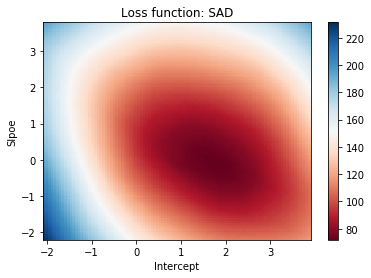

In [12]:
loss_data=np.zeros_like(I)

for index in np.ndindex(I.shape):
    loss_data[index]=np.abs(Y-X*S[index]-I[index]).sum()
    
plt.pcolormesh(I, S, loss_data, cmap='RdBu', vmin=loss_data.min(), vmax=loss_data.max() )
plt.colorbar()

ax = plt.gca()
ax.set_ylabel('Slpoe')
ax.set_xlabel('Intercept')
ax.set_title('Loss function: SAD')
plt.show()

## Geometry of least squares

The following picture will be with us, in various guises, throughout much of the course. It depicts
the geometric picture involved in least squares regression.

<img src="http://stats191.stanford.edu/figs/axes_simple.svg" width="600">

It requires some imagination but the picture should be thought as representing vectors in $n$-dimensional space, l where $n$ is the number of points in the scatterplot. In our height data, $n=1375$. The bottom two axes should be thought of as 2-dimensional, while the axis marked "$\perp$" should be thought of as $(n-2)$ dimensional, or, 1373 in this case.

## Important lengths

The (squared) lengths of the above vectors are important quantities in what follows.

There are three to note:
$$
\begin{aligned}
   SSE &= \sum_{i=1}^n(Y_i - \widehat{Y}_i)^2 = \sum_{i=1}^n (Y_i - \widehat{\beta}_0 - \widehat{\beta}_1 X_i)^2 \\
   SSR &= \sum_{i=1}^n(\overline{Y} - \widehat{Y}_i)^2 = \sum_{i=1}^n (\overline{Y} - \widehat{\beta}_0 - \widehat{\beta}_1 X_i)^2 \\
   SST &= \sum_{i=1}^n(Y_i - \overline{Y})^2 = SSE + SSR \\
   R^2 &= \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = \widehat{Cor}(\pmb{X},\pmb{Y})^2.
   \end{aligned}
$$

## Important lengths

An important summary of the fit is the ratio
$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$
which measures *how much variability in $Y$* is explained by $X$.

## Example: wages vs. experience

In this example, we'll look at the output of *lm* for the wage data and verify that some of the equations we present for the 
least squares solutions agree with the output. The [data](http://qed.econ.queensu.ca/jae/2004-v19.7/koop-tobias/) was compiled from a study in econometrics (Gary Koop and Justin L. Tobias, "Learning about Heterogeneity in Returns to Schooling", Journal of Applied Econometrics, Vol. 19, No. 7, 2004, pp. 827-849.)

Firstly, we'll read in data and prepare for further analysis. As far as column names are in a separate file from the data, we pass them manually. 

In [2]:
cwd=os.getcwd()

#cols_wages_invar=['Ability', 'Mothers_Education', 'Fathers_Education','Dummy_Residence', 'N_Siblings'] 
#wages_invar = pd.read_table(os.path.join(cwd,r".\data\03_kt-data_time_invar.dat"),
#                            names = cols_wages_invar,
#                            skipinitialspace=True,
#                            sep=' ')

cols_wages_var=['Person_id', 'Education', 'Log_Hourly_Wage','Potential_Experience', 'Time_Trend'] 
wages_var   = pd.read_table(os.path.join(cwd,r".\data\03_kt-data_time_var.dat"),
                            names = cols_wages_var,
                            skipinitialspace=True,
                            sep=' ')

In [23]:
wages_invar.shape

(2177, 1)

Then we calculate mean `Log_Hourly_Wage` for every person.

In [3]:
dfw=wages_var.loc[:,('Person_id','Education','Log_Hourly_Wage')].groupby('Person_id').mean()
dfw.Log_Hourly_Wage.mean()

2.240279398911975

Let's fit the linear regression model.

In [4]:
results=smf.ols('Log_Hourly_Wage ~ Education',data=dfw).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Hourly_Wage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     340.0
Date:                Wed, 03 Jan 2018   Prob (F-statistic):           1.15e-70
Time:                        18:15:22   Log-Likelihood:                -1114.3
No. Observations:                2178   AIC:                             2233.
Df Residuals:                    2176   BIC:                             2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2392      0.055     22.541      0.0

As in the mother-daughter data, we might want to plot the data and add the regression line.

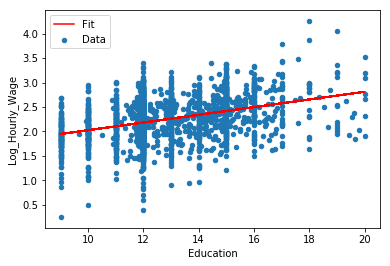

In [54]:
fig, ax = plt.subplots()
dfw.plot.scatter(x='Education',y='Log_Hourly_Wage',ax=ax,label='Data')
ax.plot(dfw.Education, results.predict(dfw.Education), color='red', label='Fit')
ax.legend()
plt.show()

## Least squares estimators

There are explicit formulae for the least squares estimators, i.e. the minimizers of the error sum of squares.

For the slope, $\hat{\beta}_1$, it can be shown that 
$$
   \widehat{\beta}_1 = \frac{\sum_{i=1}^n(X_i - \overline{X})(Y_i - \overline{Y}
)}{\sum_{i=1}^n (X_i-\overline{X})^2} = \frac{\widehat{Cov}(X,Y)}{\widehat{Var}(
X)}.$$

Knowing the slope estimate, the intercept estimate can be found easily:
$$ \widehat{\beta}_0 = \overline{Y} - \widehat{\beta}_1 \cdot \overline{
X}.$$

### Wages example

In [37]:
beta1hat = dfw.cov().loc['Education', 'Log_Hourly_Wage'] / dfw.Education.var()
beta0hat = dfw.Log_Hourly_Wage.mean() - beta1hat * dfw.Education.mean()
print('Intercept  Slope')
print(f'{beta0hat:1.3f}      {beta1hat:1.3f}')
print(f'{results.params.Intercept:1.3f}      {results.params.Education:1.3f}')

Intercept  Slope
1.239      0.079
1.239      0.079


## Estimate of $\sigma^2$

There is one final quantity needed to estimate all of our parameters in our (statistical) model for the scatterplot. This is $\sigma^2$,
the variance of the random variation within each slice (the regression model assumes this variance is constant within each slice...).

The estimate most commonly used is
$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum_{i=1}^n (Y_i - \hat{\beta}_0 - \hat{\beta}_1 X_i)^2 = \frac{SSE}{n-2} = MSE
$$

Above, note the practice of replacing the quantity $SSE(\hat{\beta}_0,\hat{\beta}_1)$, i.e. the minimum of this function, with just $SSE$.

The term *MSE* above refers to mean squared error: a sum of squares divided by what we call its *degrees of freedom*. The degrees of freedom
of *SSE*, the *error sum of squares* is therefore $n-2$. Remember this $n-2$ corresponded to $\perp$ in the picture above...

Using some statistical calculations that we will not dwell on, if our simple linear regression model is correct, then we can see that
$$
\frac{\hat{\sigma}^2}{\sigma^2} \sim \frac{\chi^2_{n-2}}{n-2}
$$
where the right hand side denotes a *chi-squared* distribution with $n-2$ degrees of freedom.

(Note: our estimate of $\sigma^2$ *is not* the maximum likelihood estimate.)

### Wages example

In [36]:
sigmahat = np.sqrt(   (results.resid**2).sum() / results.df_resid )
MSE      = np.sqrt(  ((dfw.Log_Hourly_Wage - results.predict(dfw.Education))**2).sum() / results.df_resid ) 

print(f'{sigmahat:1.3f}, {MSE:1.3f}')

0.404, 0.404


The regresison `results` object contains `sclae` parameter which is a square root of [residual standard error](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html):

In [7]:
rse=np.sqrt(results.scale)
print(f'{rse:1.3f}')


0.404


# Inference for the simple linear regression model

## What do we mean by inference?

* Generally, by inference, we mean "learning something about
   the relationship between the sample $(X_1, \dots, X_n)$ and $(Y_1, \dots, Y_n)$."

* In the simple linear regression model, this often means learning about $\beta_0, \beta_1$.  
Particular forms of inference are **confidence intervals** or **hypothesis tests**. More on these later.

* Most of the questions of *inference* in this course
   can be answered in terms of $t$-statistics or $F$-statistics.

* First we will talk about $t$-statistics, later $F$-statistics.

## Examples of (statistical) hypotheses

* [One sample problem:](http://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test) given an independent sample $\pmb{X}=(X_1, \dots, X_n)$ where $X_i\sim N(\mu,\sigma^2)$, the *null hypothesis $H_0:\mu=\mu_0$*  says that in fact the population mean is some specified value $\mu_0$.

* [Two sample problem:](http://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) given two independent samples $\pmb{Z}=(Z_1, \dots, Z_n)$, $\pmb{W}=(W_1, \dots, W_m)$  where $Z_i\sim N(\mu_1,\sigma^2)$ and $W_i \sim N(\mu_2, \sigma^2)$, the *null hypothesis $H_0:\mu_1=\mu_2$* says that in fact the population means from which the two samples are drawn are identical.

## Testing a hypothesis

We test a null hypothesis, $H_0$ based on some test statistic $t$ whose distribution is fully known when $H_0$ is true.

For example, in the one-sample problem, if $\bar{X}$ is the sample mean of our sample $(X_1, \dots, X_n)$ and
$$
S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i-\bar{X})^2
$$
is the sample variance. Then
$$
t = \frac{\bar{X}-\mu_0}{ S / \sqrt{n} }
$$
has what is called a [Student's t](http://en.wikipedia.org/wiki/Student's_t-distribution) distribution with $n-1$ degrees of freedom *when $H_0:\mu=\mu_0$ is true.* 

**When the null
hypothesis is not true, it does not have this distribution!**

## General form of a (Student's) $t$ statistic

* A $t$-statistic with $k$ degrees of freedom, has a form that becomes easy to recognize after seeing it several times. 

* It has two main parts: a numerator and a denominator. The numerator $Z \sim N(0,1)$ while denominator
$D \sim \sqrt{\chi^2_k/k}$ that is assumed *independent* of $Z$.

* The $t$-statistic has the form
$$
t = \frac{Z}{D}.
$$

## General form of a (Student's) $T$ statistic

* Another form of the $t$-statistic is
$$
t = \frac{\text{estimate of parameter} - \text{true parameter}}{\text{accuracy of the estimate}}.
$$

* In more formal terms, we write this as
$$
t= \frac{\hat{\theta} - \theta}{SE(\hat{\theta})}.
$$
Note that the denominator is the accuracy of the *estimate* and not the true parameter (which is usually assumed fixed, at least for now).
The term $SE$ or *standard error* will, in this course, usually refer to an estimate of the accuracy of estimator. Therefore, it is often 
the square root of an estimate of the variance of an estimator.

## General form of a (Student's) $t$ statistic

* In our simple linear regression model, a natural $t$-statistic is
$$
\frac{\hat{\beta}_1 - \beta_1}{SE(\hat{\beta}_1)}.
$$
We've seen how to compute $\hat{\beta}_1$, we never get to see the true $\beta_1$, so the only quantity we have anything left to say about is the standard error $SE(\hat{\beta}_1)$. 

* How many degrees of freedom would this $t$ have?

## Comparison of Student's $t$ to normal distribution

As the degrees of freedom increases, the population histogram, or density, of the $t_k$ distribution looks more and more
like the standard normal distribution usually denoted by $N(0,1)$.

In [28]:
fig, ax = plt.subplots(1,1)

x=np.linspace(-4,4,401)
norm=sp.stats.norm.pdf(x) # Normal(0,1)

ax.plot( x, norm, label = 'Z-statistic' )
ax.axvline(sp.stats.norm.ppf(0.975),linestyle='--')
ax.axvline(sp.stats.norm.ppf(0.025),linestyle='--')

ax.set_ylabel('Density')
ax.set_xlabel('t')
ax.set_title('Two sided rejection region alpha = 5 %')

ax.legend()

This change in the density has an effect on the rejection rule for hypothesis tests based on the $t_k$ distribution. For instance, for the standard normal, the 5% rejection rule is to reject if the so-called $Z$-score is larger than about 2 in absolute value.

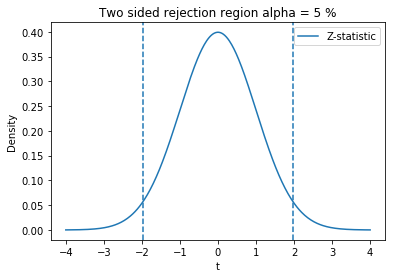

In [29]:
plt.show()

For the $t_{10}$ distribution, however, this rule must be modified.

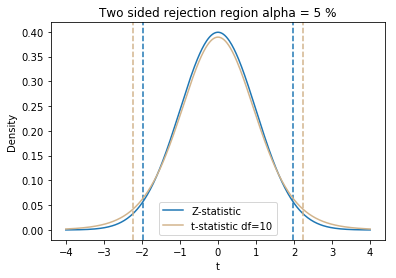

In [32]:
fig, ax = plt.subplots(1,1)

x=np.linspace(-4,4,401)
norm=sp.stats.norm.pdf(x) # Normal(0,1)
t=sp.stats.t.pdf(x,df=10) # t df=10

ax.plot( x, norm, label = 'Z-statistic' )
ax.axvline(sp.stats.norm.ppf(0.975),linestyle='--')
ax.axvline(sp.stats.norm.ppf(0.025),linestyle='--')

ax.plot( x, t, label = 't-statistic df=10',color='tan' )
ax.axvline(sp.stats.t.ppf(0.975,df=10),linestyle='--',color='tan')
ax.axvline(sp.stats.t.ppf(0.025,df=10),linestyle='--',color='tan')

ax.set_ylabel('Density')
ax.set_xlabel('t')
ax.set_title('Two sided rejection region alpha = 5 %')

ax.legend()
plt.show()

## One sample problem revisited

Above, we used the one sample problem as an example of a $t$-statistic. Let's be a little more specific.

* Given an independent sample $\pmb{X}=(X_1, \dots, X_n)$ where $X_i\sim N(\mu,\sigma^2)$ we can test $H_0:\mu=0$ using a $t$-statistic.

* We can prove that the random variables
   $$\overline{X} \sim N(\mu, \sigma^2/n), \qquad \frac{S^2_X}{\sigma^2} \sim \frac{\chi^2_{n-1}}{n-1}$$
   are independent.

* Therefore, whatever the true $\mu$ is
   $$
   \frac{\overline{X} - \mu}{S_X / \sqrt{n}} = \frac{ (\overline{X}-\mu) / (\sigma/\sqrt{n})}{S_X / \sigma} \sim t_{n-1}.$$
  
* Our null hypothesis specifies a particular value for $\mu$, i.e. 0. Therefore, under $H_0:\mu=0$ (i.e. assuming that $H_0$ is true), $$\overline{X}/(S_X/\sqrt{n}) \sim t_{n-1}.$$


## Confidence interval

The following are examples of confidence intervals you may have already seen.

* One sample problem: instead of deciding whether $\mu=0$, we might want 
to come up with an (random) interval $[L,U]$ based on the sample $\pmb{X}$ such 
that the probability
   the true (nonrandom) $\mu$ is contained in $[L,U]$ equal to $1-\alpha$, i.e. 
95%.

*  Two sample problem: find a (random) interval $[L,U]$ based on the sampl
es $\pmb{Z}$ and $\pmb{W}$ such that
   the probability the true (nonrandom) $\mu_1-\mu_2$ is contained in $[L,U]$ is
 equal to $1-\alpha$, i.e. 95%.

### Confidence interval for one sample problem

* In the one sample problem, we might be interested in a confidence interval for the unknown $\mu$.

* Given an independent sample $(X_1, \dots, X_n)$ where $X_i\sim N(\mu,\sigma^2)$ we can construct a test 
$(1-\alpha)*100\%$ using the numerator and denominator of the $t$-statistic.

### Confidence interval for one sample problem

*   Let $q=t_{n-1,(1-\alpha/2)}$

   $$
   \begin{aligned}
   1 - \alpha &= P_{\mu}\left(-q \leq \frac{\mu - \overline{X}}
   {S_X / \sqrt{n}} \leq q \right) \\
   &= P_{\mu}\left(-q \cdot {S_X / \sqrt{n}} \leq {\mu - \overline{X}} 
   \leq q  \cdot {S_X / \sqrt{n}} \right) \\
   &= P_{\mu}\left(\overline{X} - q  \cdot {S_X / \sqrt{n}} 
   \leq {\mu} \leq \overline{X} + q  \cdot {S_X / \sqrt{n}} \right) \\
   \end{aligned}
   $$
   
* Therefore, the interval $\overline{X} \pm q \cdot {S_X / \sqrt{n}}$ is a $(1-\alpha)*100\%$ confidence interval for $\mu$.


## Inference for $\beta_0$ or $\beta_1$

* Recall our model $$
   Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,$$
   errors $\varepsilon_i$ are independent $N(0, \sigma^2)$.
   
* In our heights example, we might want to now if there
   really is a linear association between ${\tt Daughter}=Y$
   and ${\tt Mother}=X$. This can be answered with a *hypothesis test* of the null hypothesis $H_0:\beta_1=0$.
   This assumes the model above is correct, but that $\beta_1=0$.
   
* Alternatively, we might want to have a range of values that we can be fairly certain $\beta_1$ lies within.
This is a *confidence interval* for $\beta_1$.

## Geometric picture of test

The hypothesis test has a geometric interpretation which we will revisit later for other models.
It is a comparison of two models. The first model is our original model.

<img src="http://stats191.stanford.edu/figs/axes_simple_full.svg" width="600">

The second model is the *null model* in which we have set $\beta_1=0$. 
This model says that
$$
Y_i = \beta_0 + \varepsilon_i.
$$
This model says that the mean of the $Y$'s is unrelated to that of $X$. 


<img src="http://stats191.stanford.edu/figs/axes_simple_reduced.svg" width="500">


*Strictly speaking,
we should write $Y_i|X$ on the left hand side as this is a model of the $Y_i$'s given the entire set of $X$ observations.
If the pairs of mothers and daughters are drawn from some population independently than we may write $Y_i | X_i$.*


## Setup for inference

* Let $L$ be the subspace of $\mathbb{R}^n$ spanned $\pmb{1}=(1, \dots, 1)$ and ${X}=(X_1, \dots, X\
_n)$.

* Then,
   $${Y} = P_L{Y} + ({Y} - P_L{Y}) = \widehat{{Y}} + (Y - \widehat{{Y}}) = \widehat{{Y}} + e$$

* In our model $\mu=\beta_0 \pmb{1} + \beta_1 {X} \in L$ so that
   $$
   \widehat{{Y}} = \mu + P_L{\varepsilon}, \qquad {e} = P_{L^{\perp}}{{Y}} = P_{L^{\perp}}{\varepsilon}$$
 
* Our assumption that $\varepsilon_i$'s are independent $N(0,\sigma^2)$ tells us that: ${e}$ and $\widehat{{Y}}$ are independent; $\widehat{\sigma}^2 = \|{e}\|^2 / (n-2) \sim \sigma^2 \cdot \chi^2_{n-2} / (n-2)$.

## Setup for inference

* In turn, this implies
$$
   \widehat{\beta}_1 \sim N\left(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n(X_i-\overline{X})^2}\right).$$

* Therefore, $$\frac{\widehat{\beta}_1 - \beta_1}{\sigma \sqrt{\frac{1}{\sum_{i=1}^n(X_i-\overline{X})^2}}} \sim N(\
0,1).$$

* The other quantity we need is the *standard error* or SE of $\hat{\beta}_1$. This is
obtained from estimating the variance of $\widehat{\beta}_1$, which, in this case means simply
plugging in our estimate of $\sigma$, yielding
$$
   SE(\widehat{\beta}_1) = \widehat{\sigma} \sqrt{\frac{1}{\sum_{i=1}^n(X_i-\overline{X})^2}} \qquad 
   \text{independent of $\widehat{\beta}_1$}$$

## Testing $H_0:\beta_1=\beta_1^0$

* Suppose we want to test that $\beta_1$ is some pre-specified
   value, $\beta_1^0$ (this is often 0: i.e. is there a linear association)

* Under $H_0:\beta_1=\beta_1^0$
   $$\frac{\widehat{\beta}_1 - \beta^0_1}{\widehat{\sigma} \sqrt{\frac{1}{\sum_{i=1}^n(X_i-\overline{X})^2}}}
   = \frac{\widehat{\beta}_1 - \beta^0_1}{ \frac{\widehat{\sigma}}{\sigma}\cdot \sigma \sqrt{\frac{1}{
\sum_{i=1}^n(X_i-\overline{X})^2}}} \sim t_{n-2}.$$


* Reject $H_0:\beta_1=\beta_1^0$ if $|t| > t_{n-2, 1-\alpha/2}$.

### Wage example

Let's perform this test for the wage data.

In [42]:
SEbeta1hat= sigmahat * np.sqrt(1 / ((dfw.Education-dfw.Education.mean())**2).sum() )
tstat=(beta1hat - 0)/SEbeta1hat
print(f'beta1hat = {beta1hat:1.4f}')
print(f'SEbeta1hat = {SEbeta1hat:1.3f}')
print(f'tstat = {tstat:1.3f}')

beta1hat = 0.0786
SEbeta1hat = 0.004
tstat = 18.440


Let's look at the output of the `ols` function again.

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log_Hourly_Wage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     340.0
Date:                Wed, 03 Jan 2018   Prob (F-statistic):           1.15e-70
Time:                        20:10:58   Log-Likelihood:                -1114.3
No. Observations:                2178   AIC:                             2233.
Df Residuals:                    2176   BIC:                             2244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2392      0.055     22.541      0.000       1.131       1.347
Education      0.0786      0.004     18.440      0.000       0.070       0.087
==============================================================================
Omnibus:                       46.662   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.725
Skew:                          -0.269   Prob(JB):                     1.07e-13
Kurtosis:                       3.606   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that `statsmodels` performs this test in the second row of the `Coefficients` table. It is clear that
wages are correlated with education.

## Why reject for large |T|?

* Observing a large $|t|$ is unlikely if $\beta_1 = \beta_1^0$: reasonable to conclude that $H_0$ is false.

* Common to report $p$-value:
$$\mathbb{P}(|t_{n-2}| > |t|) = 2 \mathbb{P} (t_{n-2} > |t|)$$

In [47]:
2*(1 - sp.stats.t.cdf(tstat , df = results.df_resid) )

0.0

## Confidence interval based on Student's $t$ distribution

*   Suppose we have a parameter estimate $\widehat{\theta} \sim N(\theta, {\sigma}_{\theta}^2)$, and standard error $SE(\widehat{\theta})$ such that
   $$
   \frac{\widehat{\theta}-\theta}{SE(\widehat{\theta})} \sim t_{\nu}.$$

* We can find a $(1-\alpha) \cdot 100 \%$ confidence interval by:
   $$
   \widehat{\theta} \pm SE(\widehat{\theta}) \cdot t_{\nu, 1-\alpha/2}.$$
   
* To prove this, expand the absolute value as we did for the one-sample CI
   $$
   1 - \alpha = \mathbb{P}\left(\left|\frac{\widehat{\theta} - \theta}{SE(\widehat{\theta})} \right| < t_{\nu, 1-\alpha/2}\right).$$


## Confidence interval for regression parameters

* Applying the above to the parameter $\beta_1$ yields a confidence interval of the form
$$
   \hat{\beta}_1 \pm SE(\hat{\beta}_1) \cdot t_{n-2, 1-\alpha/2}.$$
   
* We will need to compute $SE(\hat{\beta}_1)$. This can be computed using this formula
   $$
   SE(a_0\hat{\beta}_0 + a_1\hat{\beta}_1) = \hat{\sigma} \sqrt{\frac{a_0^2}{n} + \frac{(a_0\overline{X} - a_1)^2}{\sum_{i=1}^n \left(X_i-\overline{X}\right)^2}}.$$

We also need to find the quantity $t_{n-2,1-\alpha/2}$. This is defined by
$$
\mathbb{P}(T_{n-2} \geq t_{n-2,1-\alpha/2}) = \alpha/2.
$$
In `scipy`, this is computed by the function `ppf`.

In [54]:
alpha = 0.05
n = dfw.shape[0]
sp.stats.t.ppf(1-0.5*alpha,n-2)

1.9610547790595287

Not surprisingly, this is close to that of the normal distribution, which is a Student's $t$ with $\infty$ for degrees of freedom.

In [56]:
sp.stats.norm.ppf(1-0.5*alpha)

1.959963984540054

We will not need to use these explicit formulae all the time, as `statsmodels` / `scipy` has some built in functions
to compute confidence intervals.

In [61]:
L = beta1hat - sp.stats.t.ppf(0.975, results.df_resid) * SEbeta1hat
U = beta1hat + sp.stats.t.ppf(0.975, results.df_resid) * SEbeta1hat

print(f'L={L}, U={U}')

L=0.07024057147113995, U=0.08695844901850862


In [62]:
results.conf_int()

,0,1
Intercept,1.131387,1.347002
Education,0.070241,0.086958


## Predicting the mean

Once we have estimated a slope $(\hat{\beta}_1)$ and an intercept $(\hat{\beta}_0)$, we can predict the height
of the daughter born to a mother of any particular height by the plugging-in the height of the new mother, $M_{new}$ into
our regression equation:
$$
E[{D}_{new}] = {\beta}_0  +{\beta}_1 M_{new}.
$$
This equation says that our best guess at the height of the new daughter born to a mother of height $M_{new}$ is $\hat{D}_{new}$. 
Does this say that the height will be *exactly* this value? No, there is some random variation in each slice, and we would expect the same random variation for this new daughter's height as well.

 We might also want a confidence interval for the average height of daughters born to a mother of height $M_{new}=66$ inches:
$$
\hat{\beta}_0 + 66 \cdot \hat{\beta}_1 \pm SE(\hat{\beta}_0 + 66 \cdot \hat{\beta}_1) \cdot t_{n-2, 1-\alpha/2}.
$$

Recall that the parameter of interest is the average within the slice. Predictions for out of sample values can be obtained as follows:

In [80]:
heights_fit.predict(exog=dict(Mheight=[66,60]))

0    65.672740
1    62.422257
dtype: float64

To get confidence intervals for out of sample predictions `get_prediction` in combination with `summary_frame` methods should be used: 

In [83]:
heights_fit.get_prediction(exog=dict(Mheight=[66,60])).summary_frame(alpha=0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,65.672740,0.110524,65.490821,65.854658,61.938039,69.407440
1,62.422257,0.088261,62.276982,62.567533,58.689162,66.155353


`mean_ci_upper` and `mean_ci_lower` are the relevant values. 

## Forecasting intervals

There is yet another type of interval we might consider: can we find an interval that covers the height of a 
particular daughter knowing only that her mother's height as 66 inches?

This interval has to cover the variability of the new random variation with our slice at 66 inches. So, it must be at least
as wide as $\sigma$, and we estimate its width to be at least as wide as $\hat{\sigma}$. 

`obs_ci_lower` and `obs_ci_upper` are the relevant values. 

In [84]:
heights_fit.get_prediction(exog=dict(Mheight=[66,60])).summary_frame(alpha=0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,65.672740,0.110524,65.490821,65.854658,61.938039,69.407440
1,62.422257,0.088261,62.276982,62.567533,58.689162,66.155353


In [85]:
(69.41-61.94)

7.469999999999999

With so much data in our heights example, this 90% interval will have width roughly `2*sp.stats.norm.ppf(0.95)*sigmahatheight`.

In [93]:
sigmahatheight = np.sqrt( (heights_fit.resid**2).sum() / heights_fit.df_resid )
2 * sp.stats.norm.ppf(0.95) * sigmahatheight

7.4555008450571085

The actual width will depend on how accurately we have estimated $(\beta_0, \beta_1)$ as well as $\hat{\sigma}$. Here is the
full formula. Again it is based on the $t$ distribution, the only thing we need to change is what we use for the SE.

$$
SE(\widehat{\beta}_0 + \widehat{\beta}_1 X_{\text{new}} + \varepsilon_{\text{new}}) = \widehat{\sigma} \sqrt{1 + \frac{1}{n} + \frac{(\overline{X} - X_{\text{new}})^2}{\sum_{i=1}^n \left(X_i-\overline{X}\right)^2}}.
$$

The final interval is
$$ \hat{\beta}_0 +  \hat{\beta}_1 X_{\text{new}} \pm t_{n-2, 1-\alpha/2} \cdot SE(\hat{\beta}_0 + \hat{\beta}_1 X_{\text{new}} + \varepsilon_{\text{new}}). $$